In [44]:
from keras.layers.core import Dense, Activation
from keras.models import Sequential
from keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Convolution2D, MaxPooling2D, ZeroPadding2D
from keras.layers import Activation, Dropout, Flatten, Dense

from sklearn import datasets, preprocessing
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
# dimensions of our images.
img_width, img_height = 64, 64

train_data_dir = "../datasets/font_data64/data/train"
validation_data_dir = "../datasets/font_data64/data/validation"

datagen = ImageDataGenerator(rescale=1./255)

train_generator = datagen.flow_from_directory(
        train_data_dir,
        target_size=(img_width, img_height),
        batch_size=128,
        color_mode="grayscale")

validation_generator = datagen.flow_from_directory(
        validation_data_dir,
        target_size=(img_width, img_height),
        batch_size=32,
        color_mode="grayscale")

Found 257140 images belonging to 10 classes.
Found 2600 images belonging to 10 classes.


In [21]:
model = Sequential()
model.add(Convolution2D(32, 3, 3, input_shape=(img_width, img_height, 1)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# model.add(Convolution2D(32, 3, 3))
# model.add(Activation('relu'))
# model.add(MaxPooling2D(pool_size=(2, 2)))

# model.add(Convolution2D(32, 3, 3))
# model.add(Activation('relu'))
# model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Convolution2D(64, 3, 3))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(10))
model.add(Activation('sigmoid'))

In [22]:
model.compile(loss='binary_crossentropy',
              optimizer='Adam',
              metrics=['accuracy'])

In [23]:
nb_epoch = 30
nb_train_samples = 2048
nb_validation_samples = 832

In [37]:
history = model.fit_generator(
        train_generator,
        samples_per_epoch=nb_train_samples,
        nb_epoch=nb_epoch,
        validation_data=validation_generator,
        nb_val_samples=nb_validation_samples)

Epoch 1/30
2048/2048 [==============================] - 23s - loss: 0.2589 - acc: 0.9112 - val_loss: 0.2471 - val_acc: 0.9139

In [38]:
model.save_weights('augmented_30_epochs3.h5')

In [39]:
model.evaluate_generator(validation_generator, nb_validation_samples)

[0.22873551455827859, 0.91418269276618958]

In [40]:
model.summary()

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
convolution2d_14 (Convolution2D) (None, 62, 62, 32)    320         convolution2d_input_5[0][0]      
____________________________________________________________________________________________________
activation_20 (Activation)       (None, 62, 62, 32)    0           convolution2d_14[0][0]           
____________________________________________________________________________________________________
maxpooling2d_14 (MaxPooling2D)   (None, 31, 31, 32)    0           activation_20[0][0]              
____________________________________________________________________________________________________
convolution2d_15 (Convolution2D) (None, 29, 29, 64)    18496       maxpooling2d_14[0][0]            
___________________________________________________________________________________________

In [28]:
model.to_json()

'{"class_name": "Sequential", "keras_version": "1.2.2", "config": [{"class_name": "Convolution2D", "config": {"b_regularizer": null, "W_constraint": null, "b_constraint": null, "name": "convolution2d_14", "activity_regularizer": null, "trainable": true, "dim_ordering": "tf", "nb_col": 3, "subsample": [1, 1], "init": "glorot_uniform", "bias": true, "nb_filter": 32, "input_dtype": "float32", "border_mode": "valid", "batch_input_shape": [null, 64, 64, 1], "W_regularizer": null, "activation": "linear", "nb_row": 3}}, {"class_name": "Activation", "config": {"activation": "relu", "trainable": true, "name": "activation_20"}}, {"class_name": "MaxPooling2D", "config": {"name": "maxpooling2d_14", "trainable": true, "dim_ordering": "tf", "pool_size": [2, 2], "strides": [2, 2], "border_mode": "valid"}}, {"class_name": "Convolution2D", "config": {"W_constraint": null, "b_constraint": null, "name": "convolution2d_15", "activity_regularizer": null, "trainable": true, "dim_ordering": "tf", "nb_col": 3

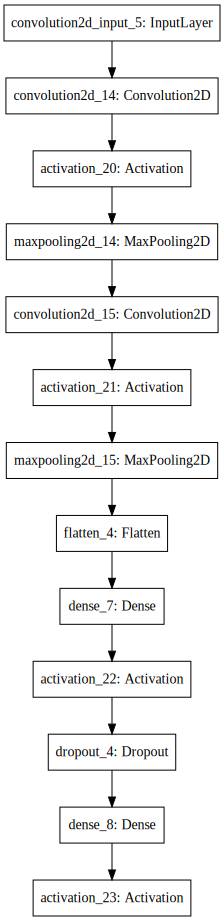

In [41]:
from IPython.display import SVG
from keras.utils.visualize_util import model_to_dot

SVG(model_to_dot(model).create(prog='dot', format='svg'))

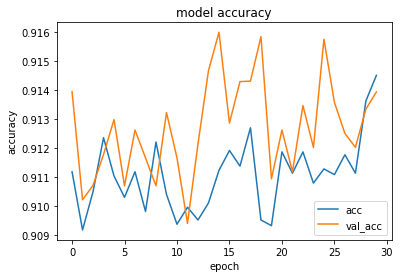

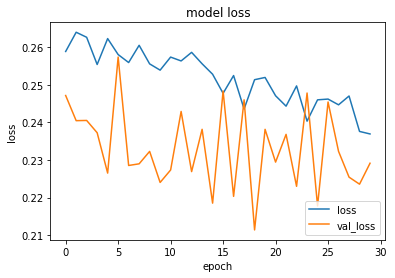

In [45]:
# http://aidiary.hatenablog.com/entry/20161109/1478696865
def plot_history(history):
    # print(history.history.keys())

    # 精度の履歴をプロット
    plt.plot(history.history['acc'])
    plt.plot(history.history['val_acc'])
    plt.title('model accuracy')
    plt.xlabel('epoch')
    plt.ylabel('accuracy')
    plt.legend(['acc', 'val_acc'], loc='lower right')
    plt.show()

    # 損失の履歴をプロット
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.xlabel('epoch')
    plt.ylabel('loss')
    plt.legend(['loss', 'val_loss'], loc='lower right')
    plt.show()

# 学習履歴をプロット
plot_history(history)